In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Recommendation Engines



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand the basic types of recommendation engine
- Calculate basic recommendations

## What is a recommendation engine?

At its most basic: a system designed to match users to things that they will like.

- The "things" can be products, brands, media, or even other people. 
- Ideally, they should be things the user doesn't know about. 
- **The goal is to rank all the possible things that are available to the user and to only present the top items**

## Who uses recommendation systems?

![](https://cdn1.vox-cdn.com/thumbor/lazP2aCcxVUI5RnbcxWpmjr7MU0=/cdn0.vox-cdn.com/uploads/chorus_asset/file/4109214/Discover_Weekly_Snapshot.0.png)

![](https://pmcvariety.files.wordpress.com/2015/09/pandora-logo.jpg?w=670&h=377&crop=1)

![](http://techlogitic.com/wp-content/uploads/2015/11/rs_560x415-140917143530-1024.Tinder-Logo.ms_.091714_copy.jpg)

![](https://pbs.twimg.com/profile_images/744949842720391168/wuzyVTTX.jpg)

## The data

What kind of data do we need?

## How do we do it?


Broadly we two options:
- Based upon similar people
- Based upon similar characteristics of the item

- The first is called **Collaborative Filtering**
- The second is called **Content-based Filtering**

## How do we get the data we need?

This is hard.  To make good collaborative filtering recommendation engines, you need a lot of data about user preferences.  

When you don't have a lot of this, you have to do what's called 'cold start.'

This is easier with content-based filtering, so we'll start there.

## Content-based Filtering



This uses characteristics of the products to make recommendations. The idea is that if you like the features of product X, then finding a product that has similar characteristics will tell us that you're likely to like it as well.


The quintessential example of this is Pandora with it's musical genome. Each song is rated on ~450 characteristics by a trained musicologist.

In [33]:
import random
random.seed(12)
songs = ["song"+str(i) for i in range(1,11)]
a = [np.random.randint(1,6) for i in range(1,11)]
b = [np.random.randint(1,6) for i in range(1,11)]
c = [np.random.randint(1,6) for i in range(1,11)]
d = [np.random.randint(1,6) for i in range(1,11)]
e = [np.random.randint(1,6) for i in range(1,11)]
f = [np.random.randint(1,6) for i in range(1,11)]
song_df = pd.DataFrame(zip(songs, a, b, c, d, e, f), columns = ['song','tempo', 'excitement', 'volume', \
                                                      'percussion', 'instrumental', 'structure']).set_index('song')


In [34]:
song_df

,tempo,excitement,volume,percussion,instrumental,structure
song,,,,,,
song1,5,4,4,5,3,4
song2,2,1,1,4,2,2
song3,3,3,1,1,2,1
song4,4,5,4,4,1,3
song5,5,5,4,4,1,3
song6,5,2,5,1,2,4
song7,5,3,2,2,2,2
song8,5,2,4,1,5,4
song9,5,5,3,1,3,2


## What is similarity?

In order to calculate how similar two things are, we need a similarity metric!

>Check: what could we use?

Some typical measure are:
- Euclidean distance
- Pearson correlation
- Cosine similarity


## Cosine Similarity

[formula](https://en.wikipedia.org/wiki/Cosine_similarity#Definition)

Cosine similarity uses the cosine between two vectors to compute a scalar value that represents how closely related these vectors are. 
- If the vectors have an angle of 0 (they are pointing in exactly the same direction), then the cosine similarity is 1 and they are perfectly similar. 
- If they point in completely different directions (the angle is 90 degrees), then the cosine similarity is 0 and they are unrelated.
- If they point in opposite directions, then the cosine similarity is negative, and they are dissimilar.

## Example

Let's calculate the most similar song to song 1

In [35]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, cosine_distances

In [36]:
# cosine sim
cos_df = pd.DataFrame(cosine_similarity(song_df, song_df), index=song_df.index, columns=song_df.index)
cos_df.head()

song,song1,song2,song3,song4,song5,song6,song7,song8,song9,song10
song,,,,,,,,,,
song1,1.000000,0.917806,0.889398,0.965629,0.967577,0.893033,0.943349,0.880983,0.893869,0.929498
song2,0.917806,1.000000,0.730297,0.821645,0.818491,0.695701,0.800417,0.743812,0.683798,0.911465
song3,0.889398,0.730297,1.000000,0.878114,0.896612,0.808290,0.961665,0.857690,0.983146,0.739600
song4,0.965629,0.821645,0.878114,1.000000,0.995603,0.861865,0.915858,0.788454,0.899285,0.821964
song5,0.967577,0.818491,0.896612,0.995603,1.000000,0.878817,0.943629,0.804783,0.915179,0.819279


>Check: do we want cosine similarity to be high or low?

In [37]:
cos_df.loc['song1',:].sort_values(ascending=False)

song
song1     1.000000
song5     0.967577
song4     0.965629
song7     0.943349
song10    0.929498
song2     0.917806
song9     0.893869
song6     0.893033
song3     0.889398
song8     0.880983
Name: song1, dtype: float64

Song 5 is most similar to song 1

In [38]:
song_df.loc[['song1', 'song5'],:]

,tempo,excitement,volume,percussion,instrumental,structure
song,,,,,,
song1,5,4,4,5,3,4
song5,5,5,4,4,1,3


In [39]:
# euclidean distance
euc_df = pd.DataFrame(euclidean_distances(song_df, song_df), index=song_df.index, columns=song_df.index)
euc_df.head()

song,song1,song2,song3,song4,song5,song6,song7,song8,song9,song10
song,,,,,,,,,,
song1,0.000000,5.744563,6.324555,2.828427,2.645751,4.690416,4.358899,4.898979,4.690416,4.000000
song2,5.744563,0.000000,3.872983,5.567764,6.000000,6.244998,4.242641,6.403124,6.244998,6.244998
song3,6.324555,3.872983,0.000000,5.291503,5.567764,5.477226,2.645751,5.656854,3.741657,7.874008
song4,2.828427,5.567764,5.291503,0.000000,1.000000,4.690416,3.872983,6.000000,4.000000,6.164414
song5,2.645751,6.000000,5.567764,1.000000,0.000000,4.582576,3.741657,5.916080,3.872983,6.244998


>Check: do we want these to be high or low?

In [40]:
euc_df.loc['song1',:].sort_values(ascending=True)

song
song1     0.000000
song5     2.645751
song4     2.828427
song10    4.000000
song7     4.358899
song6     4.690416
song9     4.690416
song8     4.898979
song2     5.744563
song3     6.324555
Name: song1, dtype: float64

Song 5 is most similar to song 1

In [65]:
song_df.loc[['song1', 'song5'],:]

,tempo,excitement,volume,percussion,instrumental,structure
song,,,,,,
song1,5,4,4,5,3,4
song5,5,5,4,4,1,3


## How can we make recommendations using this?

I could just recommend the most similar song to one you tell me you like.  

But what if you don't value the features equally?

Instead of asking you to tell me a song you like, I could ask you to rank / score the importance of the features, and make recommendations on the basis of that.

In [42]:
feature_importance = [0,3,2,4,3,5]

recom = []
for i in range(len(song_df)):
    recom.append((song_df.index[i],np.dot(feature_importance, song_df.iloc[i,:])))
recom.sort(key=lambda x: x[1])
recom

[('song3', 26),
 ('song2', 37),
 ('song7', 37),
 ('song9', 44),
 ('song6', 46),
 ('song8', 53),
 ('song4', 57),
 ('song5', 57),
 ('song1', 69),
 ('song10', 73)]

We would recommend song 10

In [43]:
print song_df.loc['song4', :]
print feature_importance

tempo           4
excitement      5
volume          4
percussion      4
instrumental    1
structure       3
Name: song4, dtype: int64
[0, 3, 2, 4, 3, 5]


## Collaborative Filtering

There are two big types:
- user-item
- item-item

## User-item

We'll first look at user-item filtering. The idea behind this method is finding your taste **doppelgänger**. This is the person who is most similar to you based upon the ratings both of you have given to a mix of products.

So, someone who likes the same stuff as you also likes this....

<img src="http://i.imgur.com/fOn04Tj.png" width=600px align='center'>

<img src="http://i.imgur.com/R0dwkgp.png">

<img src="http://i.imgur.com/B1ASjVi.png">

<img src="http://i.dailymail.co.uk/i/pix/2016/06/08/20/3510881300000578-0-image-a-1_1465413237479.jpg">

## So, let's see how we construct it

We begin with what's called a utility matrix. This is a user by product matrix.
<img src="http://i.imgur.com/Ce838dV.png">

## We'll use real data this time
Using an excerpt from the [movie lens data](https://grouplens.org/datasets/movielens/), we have real user ratings for films.


In [44]:
movies = pd.read_csv('movies.csv')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


This is a huge dataset, so just to make our calculations run, we'll subset it to users who have submitted more thatn 150 reviews, and films that have been reviewed more than 40 times.

If you were really building a recommendation engine, you would use all the data you could get your hands on!

In [45]:
big_reviewers = list(movies['user_id'].value_counts()[movies['user_id'].value_counts()>150].index)
movies = movies[movies['user_id'].isin(big_reviewers)]

In [46]:
big_movies = list(movies['title'].value_counts()[movies['title'].value_counts()>40].index)
movies = movies[movies['title'].isin(big_movies)]

In [47]:
print movies.shape
print len(set(movies['title']))

(43915, 12)
516


For ease of reading, let's strip the year from the movie names.

In [48]:
movies['title'] = movies['title'].map(lambda x: x.split("(")[0].strip())

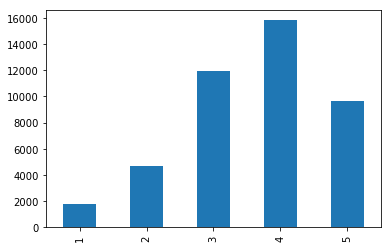

In [49]:
# distribution of ratings
movies['rating'].value_counts().sort_index().plot(kind='bar')

We need to transform this to the utilty matrix form, with user ids in the index, and movie titles in the columns, and the ratings as the values.

In [50]:
utility = pd.pivot_table(movies, index='user_id', columns = 'title', values = 'rating')
utility.head()

title,101 Dalmatians,12 Angry Men,2 Days in the Valley,"20,000 Leagues Under the Sea",2001: A Space Odyssey,Absolute Power,"Abyss, The",Ace Ventura: Pet Detective,Addams Family Values,"Adventures of Priscilla, Queen of the Desert, The",...,White Squall,William Shakespeare's Romeo and Juliet,Willy Wonka and the Chocolate Factory,Winnie the Pooh and the Blustery Day,"Wizard of Oz, The",Wolf,"Wrong Trousers, The",Wyatt Earp,Young Frankenstein,Young Guns
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,NaN,3.0,4.0,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0
5,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,5.0,...,NaN,1.0,3.0,NaN,NaN,NaN,5.0,NaN,4.0,NaN
6,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN
7,NaN,4.0,NaN,5.0,5.0,NaN,5.0,NaN,4.0,4.0,...,NaN,3.0,4.0,NaN,5.0,4.0,NaN,3.0,5.0,3.0
10,NaN,5.0,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


## Uh oh... 
What about all those NaNs??

We have a problem with sparsity, which is a very typical.  What should we do with them?

- Ignore them?
- Fill in with zeroes?
- Fill in with something else?

We can't ignore them since we need values to calculate the similarity.

If we fill them in with zeroes it assumes that they were lowly rated, rather just not rated.

We could fill in with the user's mean rating (sort of signifying indifference).

There's no easy answer!  

Since we have quite a lot of data here, we are only going to calculate similarity between users if they have 10 (arbitrary) reviews in common.

You couldn't do this if you had a really sparse matrix!

Before we do this, we're going to normalize each user's reviews.  This'll somewhat balance out the effect that some users are "easy" graders and some are "hard" graders.  Everyone's average will be the same (0).

In order to avoid negative reviews (which may cause problems with similarity), we'll add 5 to center them at 5.

In [86]:
utility_std = pd.DataFrame(index=utility.index, columns = utility.columns )

def stand(x, ave, std):
    try:
        return (x-ave) / std

    except:
        return x
    
for u in utility.index:
    ave = np.mean(utility.loc[u,:])
    std = np.std(utility.loc[u,:])
    
    utility_std.loc[u,:] = utility.loc[u,:].apply(lambda x: stand(x, ave, std))
    
utility_std = utility_std + 5

## How do we use this to make recommendations?

We can try to predict how a user will rate a film they've never seen by:
- calculating similarity to users who have seen the film
- see how those users rated the film
- calculate a weighted (by similarity) average

Then we just suggest the films that we predict they would rate highest!

We're going to use cosine similarity for this going forward.

If 2 users had seen the film:<br>
** (1st closest cosine sim x their product rating + 2nd closest cosine sim x their product rating) / (sum of 1st and 2nd's cosine sims) **

I want to predict how much user 5 will like 12 Angry Men.

In [67]:
# function to calculate similarity between any two users
# if they have fewer than n films in common, it'll return 0
def sim(user1, user2, n):
    commons = utility_std.loc[[user1,user2]].dropna(axis=1)
    if len(commons.columns)<n:
        return 0
    else:
        return cosine_similarity(commons.loc[user1,:].values.reshape(1,-1), \
                                 commons.loc[user2,:].values.reshape(1,-1))[0][0]

In [72]:
# calcultes estimated rating for a user + new film
def rating_estimator(user, title):
    '''doesnt check if user has seen title.  assumes we are only asking about unseen titles'''
    seers = list(utility_std[title].dropna().index)#find all people who have reviewed the title
    ratings = list(utility_std[title].dropna().values)
    sims = []
    for s in seers:
        sims.append(sim(user,s,10))
    return np.sum([i*j for i, j in zip(ratings, sims)]) / np.sum(sims)

In [73]:
rating_estimator(5,'12 Angry Men')

5.6108176035043567

## How can we test how good this is?

Well, we can't really. 

We could wait until user 5 sees and reviews it, and see how close we are.

Just to get a rough sense of how good this is, let's pick a movie that user 1 has seen, remove the rating, and try to predict it.

In [87]:
print utility_std.loc[1,'101 Dalmatians']
utility_std.loc[1,'101 Dalmatians'] = np.nan
print rating_estimator(1,'101 Dalmatians')

3.5169004755
4.17035109796


Now, to generate a list of recommendations, we'll cycle through all the films that the user hasn't seen, estimate how they would rate it, and show only the top 10.

In [74]:
def recommend_films(user):
    #find films i haven't seen
    new_films =  utility_std.loc[user,:][utility_std.loc[user,:].isnull()].index
    recs = []
    for new in new_films:
        recs.append((new, rating_estimator(user,new)))
    recs.sort(key=lambda x: x[1], reverse=True)
    return recs[:10]


For user 5, these are the 10 recommended films.

In [77]:
recommend_films(5)

[('Casablanca', 5.836572836861099),
 ('Godfather, The', 5.8197545129597188),
 ("Schindler's List", 5.801567752178336),
 ('Shawshank Redemption, The', 5.7806400261325388),
 ('Usual Suspects, The', 5.7662067736763358),
 ('Rear Window', 5.7424215305401347),
 ('Citizen Kane', 5.7308725726022782),
 ('Good Will Hunting', 5.6618194889368896),
 ('Lawrence of Arabia', 5.6553616047799018),
 ('Vertigo', 5.651159424256309)]

Here are user 1's top 10 films that they have seen.

In [93]:
utility_std.loc[5,:].sort_values(ascending=False).head(30)

title
Clerks                                               6.41105
Close Shave, A                                       6.41105
Return of the Jedi                                   6.41105
Return of the Pink Panther, The                      6.41105
American Werewolf in London, An                      6.41105
Serial Mom                                           6.41105
Duck Soup                                            6.41105
Mystery Science Theater 3000: The Movie              6.41105
Blade Runner                                         6.41105
Blues Brothers, The                                  6.41105
Men in Black                                         6.41105
Wrong Trousers, The                                  6.41105
Brady Bunch Movie, The                               6.41105
Star Trek: The Wrath of Khan                         6.41105
Raiders of the Lost Ark                              6.41105
Forbidden Planet                                     6.41105
This Is Spinal Tap

## Item-to-item filtering

Item-item similarity compares how similar items are by how they are rated.

So, people who liked this thing, also liked this other thing.

This can also we used with purchases (people who bought this, also bought that... Amazon is a classic example of this).

We'll use the same dataframe, but transpose it to make it more intuitive:

In [58]:
i2i = utility_std.T
i2i

user_id,1,5,6,7,10,11,13,18,21,23,...,892,894,896,897,916,919,932,933,934,943
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians,3.5169,4.09248,NaN,NaN,NaN,NaN,3.85135,NaN,NaN,NaN,...,NaN,NaN,3.13616,NaN,NaN,NaN,2.91161,NaN,3.01202,NaN
12 Angry Men,6.12845,NaN,5.30615,4.88838,6.37304,NaN,5.39271,3.93662,NaN,NaN,...,6.12786,NaN,NaN,NaN,NaN,NaN,6.10632,NaN,NaN,NaN
2 Days in the Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.00328,NaN,5.69488,NaN,NaN,NaN,NaN,3.83896
"20,000 Leagues Under the Sea",4.38742,NaN,NaN,5.90308,NaN,NaN,3.85135,NaN,NaN,NaN,...,NaN,NaN,4.8704,4.98769,NaN,NaN,5.04141,NaN,NaN,NaN
2001: A Space Odyssey,5.25793,5.63819,6.26218,5.90308,6.37304,5.65862,6.16339,3.93662,NaN,NaN,...,6.12786,NaN,4.8704,3.95952,5.69488,NaN,6.10632,6.03846,5.24698,NaN
Absolute Power,NaN,NaN,NaN,NaN,NaN,5.65862,NaN,NaN,4.7915,NaN,...,4.95325,NaN,4.8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abyss, The",4.38742,NaN,NaN,5.90308,4.61245,NaN,4.62203,NaN,6.30434,NaN,...,NaN,NaN,5.73751,NaN,5.69488,NaN,NaN,4.32038,NaN,NaN
Ace Ventura: Pet Detective,4.38742,NaN,NaN,NaN,NaN,NaN,3.08067,NaN,NaN,NaN,...,4.95325,NaN,4.00328,NaN,NaN,NaN,2.91161,3.46134,5.24698,5.41972
Addams Family Values,NaN,4.09248,NaN,4.88838,NaN,4.55059,NaN,2.75095,NaN,5.40695,...,NaN,NaN,4.8704,NaN,NaN,NaN,NaN,NaN,NaN,3.04858


Again, I want to predict how much user 5 will like 12 Angry Men.

I will look at other films user 5 has seen and calculate their similarity to 12 Angry Men in terms of how people rate them.


**Simplified Example**:
If user 5 has seen 2 other films:<br>
** (1st closest cosine sim film x U1's product rating + 2nd closest cosine sim film x U2's rating) / (sum of 1st and 2nd's cosine sims) **

In [59]:
# function to calculate similarity between any two films
# if they have fewer than n reviewers in common, it'll return 0
def sim_film(film1, film2, n):
    commons = i2i.loc[[film1,film2]].dropna(axis=1)
    if len(commons.columns)<n:
        return 0
    else:
        return cosine_similarity(commons.loc[film1,:].values.reshape(1,-1), \
                                 commons.loc[film2,:].values.reshape(1,-1))[0][0]
    return commons

In [60]:
sim_film('Ace Ventura: Pet Detective', 'Scream', 5)

0.96677883328871184

In [61]:
def rating_estimator_i2i(user, title):
    '''doesnt check if user has seen title.  assumes we are only asking about unseen titles'''
    #find all films the user has seen
    films = list(i2i[user].dropna().index)
    ratings = list(i2i[user].dropna().values)
    sims = []
    for f in films:
        sims.append(sim_film(title,f,10))
    return np.sum([i*j for i, j in zip(ratings, sims)]) / np.sum(sims)


In [62]:
def recommend_films_i2i(user):
    #find films i haven't seen
    new_films =  utility_std.loc[user,:][utility_std.loc[user,:].isnull()].index
    recs = []
    for new in new_films:
        recs.append((new, rating_estimator_i2i(user,new)))
    recs.sort(key=lambda x: x[1], reverse=True)
    return recs[:10]
    

Here are the top 10 recommendations.

In [63]:
recommend_films_i2i(5)

[('Shallow Grave', 5.1377753231080199),
 ('Notorious', 5.1253110202594039),
 ('City of Lost Children, The', 5.121163123691665),
 ("Ulee's Gold", 5.1160942304597592),
 ('Sunset Blvd.', 5.1061975974448979),
 ('Local Hero', 5.1020226304715015),
 ('Three Colors: White', 5.1012065475369104),
 ('Othello', 5.099629379233356),
 ('Roman Holiday', 5.0973576746098637),
 ('All About Eve', 5.0948249991176224)]

In [94]:
utility_std.loc[5,:].sort_values(ascending=False).head(25)

title
Clerks                                               6.41105
Close Shave, A                                       6.41105
Return of the Jedi                                   6.41105
Return of the Pink Panther, The                      6.41105
American Werewolf in London, An                      6.41105
Serial Mom                                           6.41105
Duck Soup                                            6.41105
Mystery Science Theater 3000: The Movie              6.41105
Blade Runner                                         6.41105
Blues Brothers, The                                  6.41105
Men in Black                                         6.41105
Wrong Trousers, The                                  6.41105
Brady Bunch Movie, The                               6.41105
Star Trek: The Wrath of Khan                         6.41105
Raiders of the Lost Ark                              6.41105
Forbidden Planet                                     6.41105
This Is Spinal Tap

## Conclusion

We have looked at the major types of recommender systems in this lesson. Let's quickly wrap up by looking at the pros and cons of each.

**Collaborative Filtering:**

Pros:
- No need to hand craft features

Cons:
- Needs a large existing set of ratings (cold-start problem)
- Sparsity occurs when the number of items far exceeds what a person could purchase

**Content-based Filtering:**

Pros:
- No need for a large number of users

Cons:
- Lacks serendipity... you're not going to find 'new' likes
- May be difficult to generate the right features
- Hard to create cross-content recommendations (different feature spaces)

In fact, the best solution -- and the one most likely in use in any large-scale, production system is a combination of both of these. This is known as a **hybrid system**. By combining the two systems, you can get the best of both worlds.

## Independent practice:

Now your turn!  Try to build on this recommender.  Here are some things you could try.
- change the similarity metric (correlation / euclidean distance)
- combine them to make a hybrid
- change the amount of overlap required to calculate similarity
- kmeans clustering!  It's still an unsupervised learning problem of grouping like with like.  How could you implement clustering here?

## Additional Resources

- [Wharton Study of Recommender Systems](http://knowledge.wharton.upenn.edu/article/recommended-for-you-how-well-does-personalized-marketing-work/)
- [Netflix Recommendations](https://www.rtinsights.com/netflix-recommendations-machine-learning-algorithms/)
- [Netflix Paper](http://dl.acm.org/citation.cfm?id=2843948)
- [NY Times Rec System](https://open.blogs.nytimes.com/2015/08/11/building-the-next-new-york-times-recommendation-engine)
- [Evaluating Rec Systems](https://www.quora.com/How-do-you-measure-and-evaluate-the-quality-of-recommendation-engines)
- [How to build a rec system](http://blogs.gartner.com/martin-kihn/how-to-build-a-recommender-system-in-python/)